<a href="https://colab.research.google.com/github/GIBSONGODSAN/MachineLearningAlgorithms/blob/main/AI%26ML_ALGORITHMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u> Decision Trees </u>

Like SVMs, Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multi-output tasks. They are very powerful algorithms, capable of fitting complex datasets. Decision Trees split the instances into two or more homogeneous sets based on most significant splitter / differentiator in input variables.

Decision Trees are also the fundamental components of Random Forests, which are among the most powerful Machine Learning algorithms available today.

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
# Replace the name of your uploaded file
df_iris = pd.read_csv(io.StringIO(uploaded['Iris.csv'].decode('utf-8')))

# Print the first few rows of the DataFrame
print(df_iris.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
# Removing the unnecessary column
df_iris.drop('Id',axis=1,inplace=True)

df_iris_X = df_iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_iris_y = df_iris.Species

tree_clf = DecisionTreeClassifier(max_depth=2, random_state = 36)
tree_clf.fit(df_iris_X, df_iris_y)

DecisionTreeClassifier(max_depth=2, random_state=36)

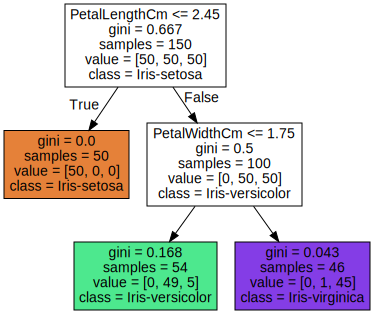

In [ ]:
# Visualize the trained Decision Tree by export_graphviz() method

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

labels = df_iris_X.columns

graph = Source(tree.export_graphviz(tree_clf ,feature_names = labels, class_names = df_iris_y.unique(), max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
tree_clf.predict_proba([[1,1, 5, 1.5]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict([[1,1, 5, 1.5]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)

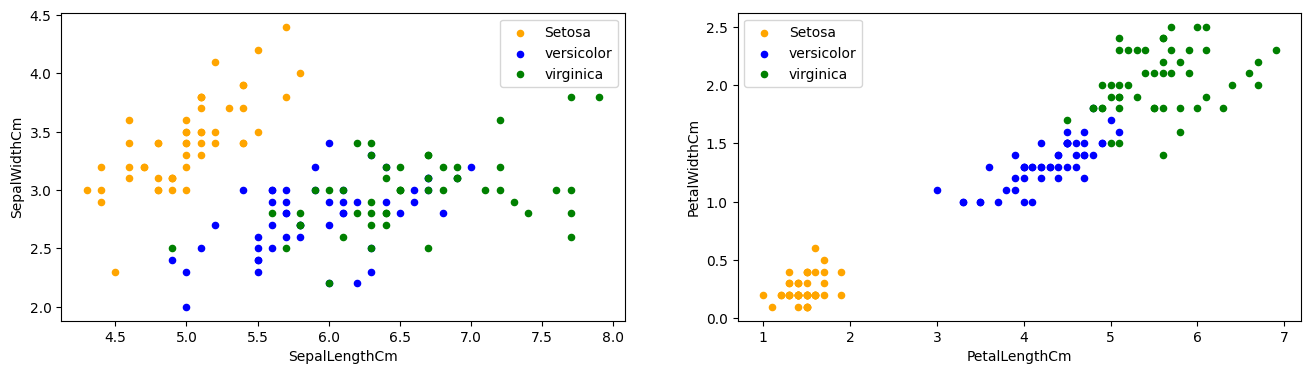

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16,4)

df_iris[df_iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa', ax = ax1)
df_iris[df_iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=ax1)
df_iris[df_iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=ax1)

df_iris[df_iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa', ax = ax2)
df_iris[df_iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=ax2)
df_iris[df_iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=ax2)

plt.show() 

# <u> SUPPERT VECTOR MACHINE ( SVM ) </u>

SVM was developed in the 1960s and refined in the 1990s. It becomes very popular in the machine learning field because SVM is very powerful compared to other algorithms.

SVM ( Support Vector Machine) is a supervised machine learning algorithm. That’s why training data is available to train the model. SVM uses a classification algorithm to classify a two-group problem. SVM focus on decision boundary and support vectors, which we will discuss in the next section.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [ ]:
# Replace 'myfile.csv' with the name of your uploaded file
dataset = pd.read_csv(io.StringIO(uploaded['Social_Network_Ads.csv'].decode('utf-8')))

# Print the first few rows of the DataFrame
print(dataset.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
#Split Dataset into X and Y
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
#Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train, X_test)

In [ ]:
#Fit SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predict the Test Set Results
y_pred = classifier.predict(X_test)
#print(y_pred)

In [ ]:
#Make the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[64  4]
 [ 3 29]]
0.93


<ipython-input-18-73e2047451e4>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


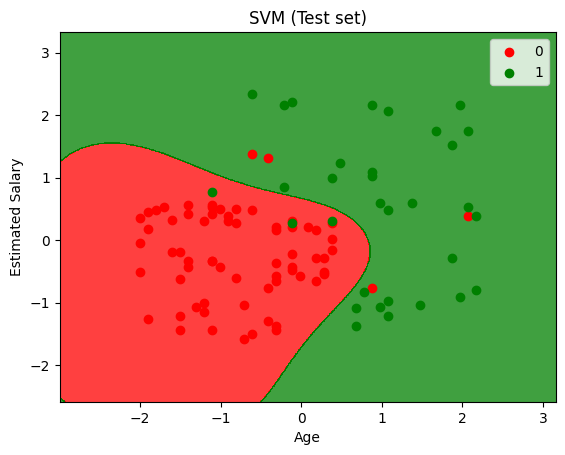

In [ ]:
#Visualise the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

As you can see in the image, there are a total of 7 incorrect predictions. There are 3 green(Yes) predictions that were predicted as Red(No) and 4 Red(No) predictions that were predicted as Green(Yes).

But overall we got 93% accuracy and that’s great.

# <u> LINEAR REGRESSION </u>
Linear Regression is a type of Regression Model and a Supervised Learning Algorithm in Machine Learning. It is one of the basic Machine Learning Model every Machine Learning enthusiast should know. Linear Regression is a linear approach to modelling the relationship between a scalar response (y — dependent variables) and one or more explanatory variables (X — independent variables).

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# load the iris dataset
iris=datasets.load_iris()

In [ ]:
# Creating pd DataFrames
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])

In [ ]:
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


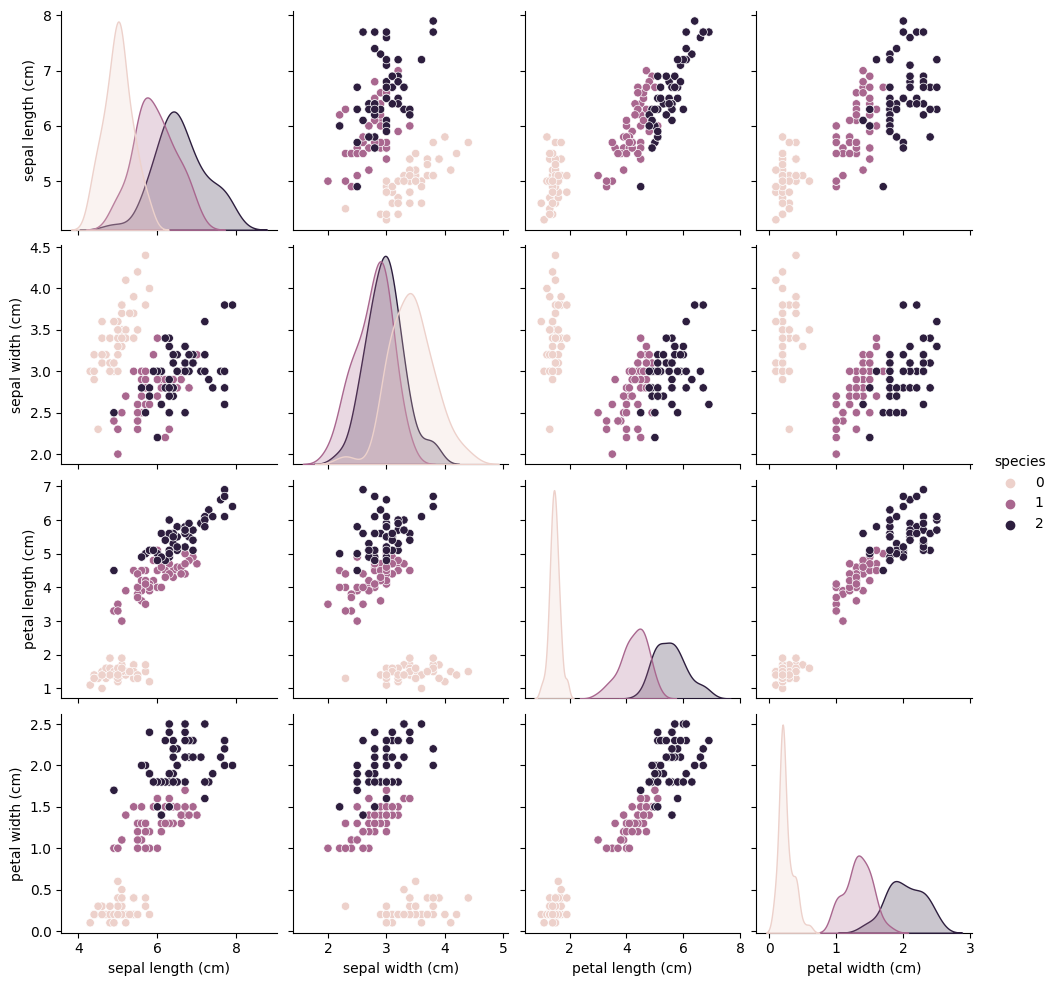

In [ ]:
sns.pairplot(iris_df, hue= 'species')

In [ ]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
# Converting Objects to Numerical dtype
iris_df.drop('species', axis= 1, inplace= True)
target_df = pd.DataFrame(columns= ['species'], data= iris.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [ ]:
# Splitting the Dataset 
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)

In [ ]:
# Instantiating LinearRegression() Model
lr = LinearRegression()

In [ ]:
# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.2881037705121511
Mean Squared Error: 0.12109420607197019
Mean Root Squared Error: 0.347985927979811


In [ ]:
#let us predict 
iris_df.loc[6]

sepal length (cm)    4.6
sepal width (cm)     3.4
petal length (cm)    1.4
petal width (cm)     0.3
species              0.0
Name: 6, dtype: float64

In [ ]:
pred = lr.predict(X_test)
print('Predicted Sepal Length (cm):', pred[0])
print('Actual Sepal Length (cm):', 4.6)

Predicted Sepal Length (cm): 0.05742815589274697
Actual Sepal Length (cm): 4.6


As you can see, there is a discrepancy between the predicted value and the actual value, the difference is approximate 0.283 cm (3 S.F.) which is a little bit higher than the mean absolute error.

# <u> MULTIPLE LINEAR REGRESSION </u>
Multiple Linear Regression is an extension of Simple Linear regression as it takes more than one predictor variable to predict the response variable. It is an important regression algorithm that models the linear relationship between a single dependent continuous variable and more than one independent variable. It uses two or more independent variables to predict a dependent variable by fitting a best linear relationship.

It has two or more independent variables (X) and one dependent variable (Y), where Y is the value to be predicted. Thus, it is an approach for predicting a quantitative response using multiple features.

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
# Replace the name of your uploaded file
dataset = pd.read_csv(io.StringIO(uploaded['advertising.csv'].decode('utf-8')))

# Print the first few rows of the DataFrame
print(dataset.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
#describing the dataset
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
#Setting the value for X and Y
x = dataset[['TV', 'Radio', 'Newspaper']]
y = dataset['Sales']

In [ ]:
# Splitting the Dataset 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 100)

In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  4.196117968423545
Coefficients:


[('TV', 0.05397837488615915),
 ('Radio', 0.11186385389388918),
 ('Newspaper', 0.007598522587698955)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [ 9.35313845 20.93096922 16.50748915 20.14296212 21.66980335 16.08794927
 13.50408304 15.29859962 20.8426625  21.01613264 12.20781418 20.76116786
  8.09300273 16.76577005 10.41982747  9.8905618  16.30462502 14.52324343
 17.19440115 12.53001052 18.50040164 12.0563774  20.4813601  17.78060587
 16.69302791 21.59319807 20.15069724 10.77847782 19.10046016 14.80556694
 13.13668771  8.96779835 12.03720575 16.58490173  8.33247023 13.996531
  9.83856747 14.17757075 16.68078629 17.18225784 18.90072177 15.42105824
 15.77368515 16.80265721 12.96499303 10.41669761 10.67611084 20.83145425
 10.10683262  6.77684776 17.86141614 18.17007289 12.56557095 16.28005317
 18.94001151 11.33709848  5.82330113 10.01132093 17.57657166 13.20139783
 18.56649462 17.4383325  20.45567567 15.28298004 12.06421286  8.59509004]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
126,6.6,9.353138
104,20.7,20.930969
99,17.2,16.507489
92,19.4,20.142962
111,21.8,21.669803


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 90.02
Mean Absolute Error: 1.2872408185574962
Mean Square Error: 2.804721920416303
Root Mean Square Error: 1.674730402308474


The Multiple Linear Regression model performs well as 90.11% of the data fit the regression model. Also, the mean absolute error, mean square error, and the root mean square error are less.

# <u> LOGISTIC REGRESSION </u>

Logistic Regression is a supervised classification algorithm. Although the name says regression, it is a classification algorithm. Logistic regression measures the relationship between one or more independent variables (X) and the categorical dependent variable (Y) by estimating probabilities using a logistic(sigmoid) function. The term “Regression” comes because it estimates the probability of class membership or simply it is regressing for the probability of a categorical outcome.


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
dataset_iris = datasets.load_iris()

In [ ]:
# Splitting the dataset into the Training set and Test set
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)

In [ ]:
#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


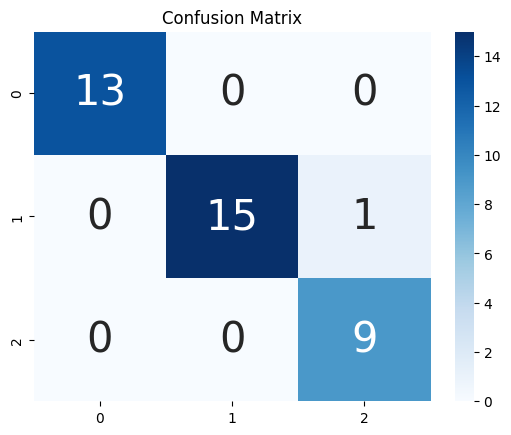

In [ ]:
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

# <u> RANDOM FORESTS </u>
Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.

Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name Random Forest. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [ ]:
# Replace the name of your uploaded file
df = pd.read_csv(io.StringIO(uploaded['car_evaluation.csv'].decode('utf-8')))

# Print the first few rows of the DataFrame
print(df.head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [ ]:
#Exploratory data analysis
df.shape
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
#Rename column names
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
#summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
#Frequency distribution of values in variables

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
     print(df[col].value_counts())   

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
4        432
5more    432
2        431
Name: doors, dtype: int64
4       576
more    576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
med     576
high    576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [ ]:
#Explore class variable
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
#Missing values in variables
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
# Declare feature vector and target variable

X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
#Split data into separate training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (570, 6))

### Feature Engineering 

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [ ]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [ ]:
#Encode categorical variables

X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


In [ ]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [ ]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [ ]:
#Random Forest Classifier model with default parameters

# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)

In [ ]:
# fit the model

rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

In [ ]:
# Check accuracy score 

from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9649


In [ ]:
#Random Forest Classifier model with parameter n_estimators=100
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


In [ ]:
# fit the model to the training set

rfc_100.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [ ]:
# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


In [ ]:
#Find important features with Random Forest model 

# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [ ]:
# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

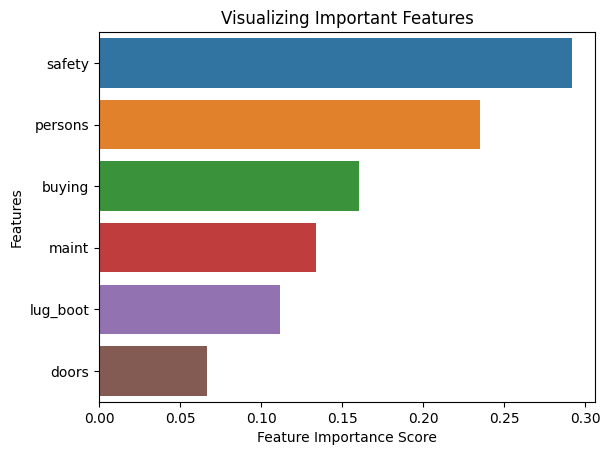

In [ ]:
#Visualize feature scores of the features

# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [ ]:
#Build Random Forest model on selected features

# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [ ]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results
y_pred = clf.predict(X_test)

# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9263


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[108   5  12   2]
 [  1  10   2   5]
 [ 10   0 389   0]
 [  4   1   0  21]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.85      0.86       127
        good       0.62      0.56      0.59        18
       unacc       0.97      0.97      0.97       399
       vgood       0.75      0.81      0.78        26

    accuracy                           0.93       570
   macro avg       0.80      0.80      0.80       570
weighted avg       0.93      0.93      0.93       570



# <u> K-means Algorithm & Gaussian Mixture Model </u>

EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
import io

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

Text(0, 0.5, 'Petal Width')

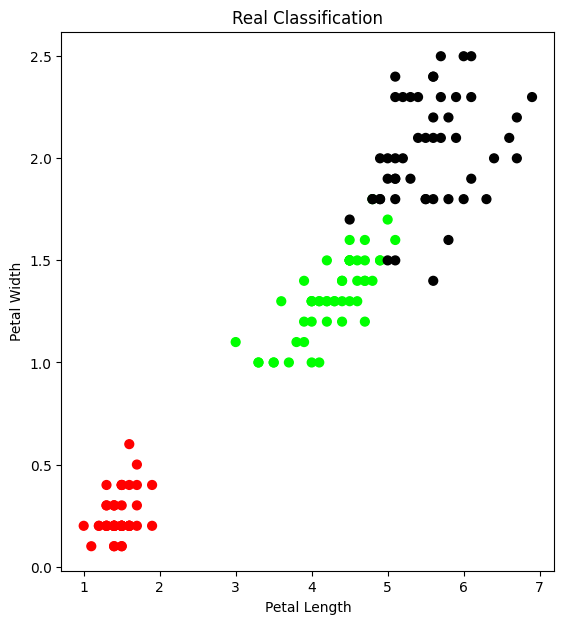

In [ ]:
plt.figure(figsize=(14,7))

colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


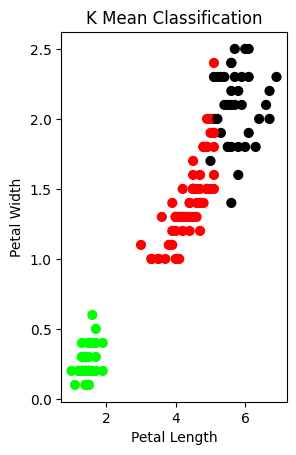

In [ ]:
# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('The accuracy score of K-Mean: ',sm.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean: ',sm.confusion_matrix(y, model.labels_))

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
xs.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
68,0.432165,-1.973554,0.421734,0.395774
45,-1.264185,-0.131979,-1.340227,-1.183812
102,1.522676,-0.131979,1.217458,1.185567
20,-0.537178,0.788808,-1.169714,-1.315444
141,1.280340,0.098217,0.762758,1.448832


In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

y_gmm = gmm.predict(xs)


Text(0, 0.5, 'Petal Width')

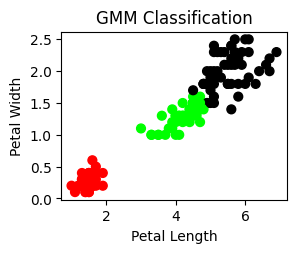

In [ ]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40)
plt.title('GMM Classification')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [ ]:
print('The accuracy score of EM: ',sm.accuracy_score(y, y_gmm))
print('The Confusion matrix of EM: ',sm.confusion_matrix(y, y_gmm))

The accuracy score of EM:  0.9666666666666667
The Confusion matrix of EM:  [[50  0  0]
 [ 0 45  5]
 [ 0  0 50]]


# <u> KNN ALGORITHM </u>

A program to implement k-Nearest Neighbour algorithm to classify the iris data set. Print both correct and wrong predictions. Java/Python ML library classes can be used for this problem.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets

In [ ]:
iris=datasets.load_iris()

In [ ]:
x = iris.data
y = iris.target

In [ ]:
print ('sepal-length', 'sepal-width', 'petal-length', 'petal-width')
#print(x)
print('class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica')
#print(y)

sepal-length sepal-width petal-length petal-width
class: 0-Iris-Setosa, 1- Iris-Versicolour, 2- Iris-Virginica


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
#To Training the model and Nearest nighbors K=5
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
#To make predictions on our test data
y_pred=classifier.predict(x_test)

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy Metrics')
print(classification_report(y_test,y_pred)) 

Confusion Matrix
[[10  0  0]
 [ 0 14  1]
 [ 0  1 19]]
Accuracy Metrics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      0.93      0.93        15
           2       0.95      0.95      0.95        20

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

